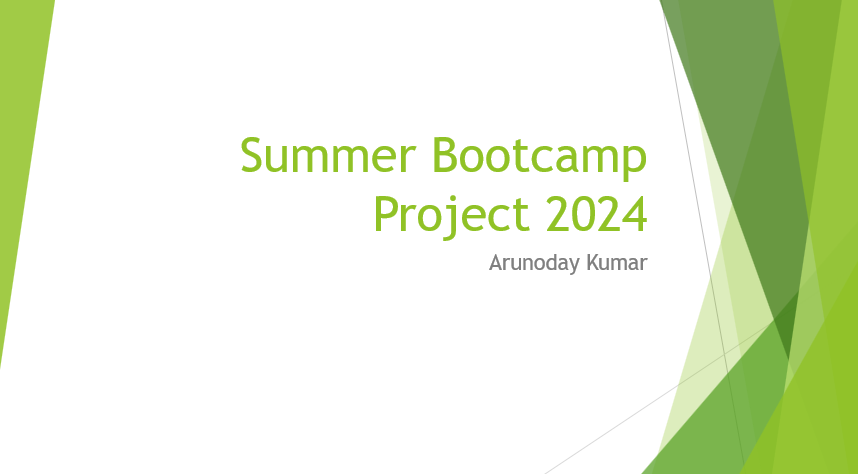

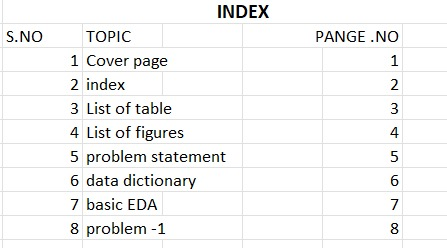

# **List of tables**

# **List of figures**

# **Problem statement\Objective**
Bright Motor Company want to analyze the data to get a fair idea about the demand of customers which will help them in enhancing their customer experience. Suppose you are a Data Scientist at the company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

# Data Description

*  	Age: The age of the individual in year.
* Gender: The gender of the individual, categorized as male or female.
* Profession: The occupation or profession of the individual.
*	Marital_status: The marital status of the individual, such as married &, single
* Education: The educational qualification of the individual Graduate and Post Graduate
* No_of_Dependents: The number of dependents (e.g., children, elderly parents) that the individual supports financially.
* Personal_loan: A binary variable indicating whether the individual has taken a personal loan "Yes" or "No"
* House_loan: A binary variable indicating whether the individual has taken a housing loan "Yes" or "No"
* Partner_working: A binary variable indicating whether the individual's partner is employed "Yes" or "No"
* Salary: The individual's salary or income.
* Partner_salary: The salary or income of the individual's partner, if applicable.
* Total_salary: The total combined salary of the individual and their partner (if applicable).
*	Price: The price of a product or service.
*	Make: The type of automobile



# **Basic Steps**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**1-	Display the top 5 rows.**

In [ ]:
df=pd.read_csv('/content/project1.csv')
print(df.head())

   Age  Gender Profession Marital_status      Education No_of_Dependents  \
0   53    Male   Business        Married  Post Graduate                4   
1   53   Femal   Salaried        Married  Post Graduate                4   
2   53  Female   Salaried        Married  Post Graduate                3   
3   53  Female   Salaried        Married       Graduate                ?   
4   53    Male        NaN        Married  Post Graduate                3   

  Personal_loan House_loan Partner_working   Salary  Partner_salary  \
0            No         No             Yes  99300.0         70700.0   
1           Yes         No             Yes  95500.0         70300.0   
2            No         No             Yes  97300.0         60700.0   
3           Yes         No             Yes  72500.0         70300.0   
4            No         No             Yes  79700.0         60200.0   

   Total_salary  Price Make  
0        170000  61000  SUV  
1        165800  61000  SUV  
2        158000  57000  SU

## **Observation**
* 1.The '?' in the 'Make' and 'No_of_Dependents' column is the wrong
entity which will be replaced with NaN, and all NaN values were filled with the mean of the respective column.
* 2.Gender column has 'Femal' instead of 'Female'.
* 3.Profession column has NaN values.




**2-	Display the last 5 rows**

In [ ]:
print(df.tail())

      Age Gender Profession Marital_status Education No_of_Dependents  \
1576   22   Male   Salaried         Single  Graduate                2   
1577   22   Male   Business        Married  Graduate                4   
1578   22   Male   Business         Single  Graduate                2   
1579   22   Male   Business        Married  Graduate                3   
1580   22   Male   Salaried        Married  Graduate                4   

     Personal_loan House_loan Partner_working   Salary  Partner_salary  \
1576            No        Yes              No  33300.0             0.0   
1577            No         No              No  32000.0             NaN   
1578            No        Yes              No  32900.0             0.0   
1579           Yes        Yes              No  32200.0             NaN   
1580            No         No              No  31600.0             0.0   

      Total_salary  Price       Make  
1576         33300  27000  Hatchback  
1577         32000  31000  Hatchback  

**3-	Check the shape of dataset.**

In [ ]:
df.shape

(1581, 14)

# **Observation**


**4-	Check the datatypes of each feature.**

In [ ]:
print(df.dtypes)

Age                   int64
Gender               object
Profession           object
Marital_status       object
Education            object
No_of_Dependents     object
Personal_loan        object
House_loan           object
Partner_working      object
Salary              float64
Partner_salary      float64
Total_salary          int64
Price                 int64
Make                 object
dtype: object


**5-	Check the Statistical summary**

In [ ]:
df.describe()

,Age,Salary,Partner_salary,Total_salary,Price
count,1581.000000,1568.000000,1475.000000,1581.000000,1581.000000
mean,31.952562,60276.913265,20225.559322,79625.996205,35948.170778
std,8.712549,14636.200199,19573.149277,25545.857768,21175.212108
min,14.000000,30000.000000,0.000000,30000.000000,58.000000
25%,25.000000,51900.000000,0.000000,60500.000000,25000.000000
50%,29.000000,59450.000000,25600.000000,78000.000000,31000.000000
75%,38.000000,71700.000000,38300.000000,95900.000000,47000.000000
max,120.000000,99300.000000,80500.000000,171000.000000,680000.000000


### Observation
* The minimum age is 14 and max age is 120 which seems wrong entries.Needs to be checked further
* Partner salary is 0 which seems wrong entries.



**6-	Check the null values**

In [ ]:
print(df.isnull().sum())

Age                   0
Gender               53
Profession            6
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary               13
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64


##Observation
There are missing values in several columns: 53 in Gender, 6 in Profession, 13 in Salary and 106 in Partner in salary whereas remaining columns does not have null values.

In [ ]:
df['No_of_Dependents'].value_counts()

No_of_Dependents
3    557
2    556
1    229
4    217
0     20
?      2
Name: count, dtype: int64

**7-	Check the duplicate values**

In [ ]:
print(df.duplicated().sum())

0


##Observation
There is no duplicate rows and columns.

**8-	Check the outliers and their authenticity.**

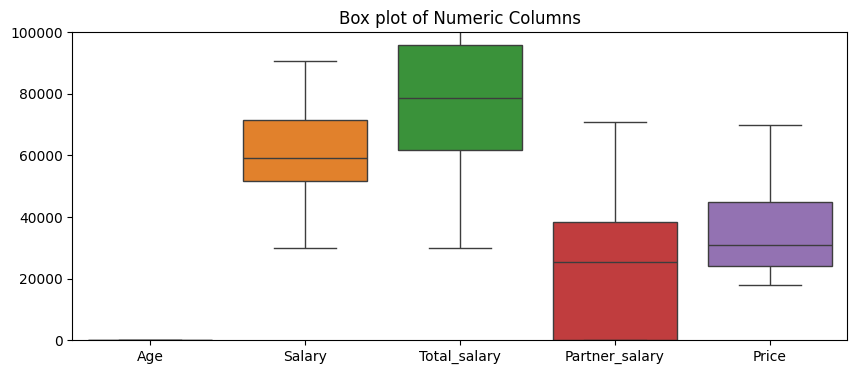

In [ ]:
plt.figure(figsize=(10,4))
sns.boxplot(data=df[['Age', 'No_of_Dependents', 'Salary', 'Total_salary', 'Partner_salary', 'Price']]) # Use a list to select multiple columns
plt.title('Box plot of Numeric Columns')
plt.ylim(0, 100000)
plt.show()

#**9-	Check the anomalies or wrong entries.**

In [ ]:
for column in df.columns:
    if df[column].dtype == 'object':
      unique_values = df[column].unique()
      print(f"Unique values in '{column}': {unique_values}")
    else:
      value_range=(df[column].min(),df[column].max())
      print(f"Range of values in {column}: {value_range}")

Range of values in Age: (14, 120)
Unique values in 'Gender': ['Male' 'Femal' 'Female' nan 'Femle']
Unique values in 'Profession': ['Business' 'Salaried' nan]
Unique values in 'Marital_status': ['Married' 'Single']
Unique values in 'Education': ['Post Graduate' 'Graduate']
Unique values in 'No_of_Dependents': ['4' '3' '?' '2' '1' '0']
Unique values in 'Personal_loan': ['No' 'Yes']
Unique values in 'House_loan': ['No' 'Yes']
Unique values in 'Partner_working': ['Yes' 'No']
Range of values in Salary: (30000.0, 99300.0)
Range of values in Partner_salary: (0.0, 80500.0)
Range of values in Total_salary: (30000, 171000)
Range of values in Price: (58, 680000)
Unique values in 'Make': ['SUV' '?' 'Sedan' 'Hatchback']


#**Observation**
1.	Age:
	There are ages like 14 and 120 which seem to be anomalies.
2.	Gender:
	There are inconsistent entries like 'Femal' and 'Femle'.
3.	Profession:
	There are missing values (NaN).
4.	No_of_Dependents:
There are entries with '?' which should be numeric.
5.	Price:
There is an entry '58' which seems to be an anomaly, and an unusually high value '680000' which needs verification.
6.	Make:
There are entries with '?' which should be clarified.


**10-	Do the necessary data cleaning steps like dropping duplicates, unnecessary columns, null value imputation, outliers treatment etc.**

In [ ]:
 #Correct the spelling in the Gender column
df['Gender'] = df['Gender'].replace({'Femal': 'Female'})

# Handle "?" values
df.replace("?", np.nan, inplace=True)

# Convert columns to appropriate data types
df['No_of_Dependents'] = pd.to_numeric(df['No_of_Dependents'], errors='coerce')
df['Salary'] = pd.to_numeric(df['Salary'], errors='coerce')
df['Partner_salary'] = pd.to_numeric(df['Partner_salary'], errors='coerce')
df['Total_salary'] = pd.to_numeric(df['Total_salary'], errors='coerce')



**Drop duplicate rows**

In [ ]:
df.drop_duplicates(inplace=True)

#Unnecessary Columns
There is no unnecessary column

# **Null value imputation**

In [ ]:
# Handling missing values
df['No_of_Dependents'].fillna(df['No_of_Dependents'].median(), inplace=True)
df.dropna(subset=['Profession'], inplace=True)
df['Salary'].fillna(df['Salary'].median(), inplace=True)
df['Partner_salary'].fillna(df['Partner_salary'].median(), inplace=True)

 #Display cleaned data
df

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
3,53,Female,Salaried,Married,Graduate,2.0,Yes,No,Yes,72500.0,70300.0,142800,61000,NaN
7,52,Male,Salaried,Married,Graduate,4.0,No,No,Yes,79100.0,40400.0,119500,68000,SUV
8,52,Male,Salaried,Married,Post Graduate,2.0,No,No,No,89400.0,0.0,89400,61000,SUV
13,50,Female,Salaried,Married,Post Graduate,3.0,No,No,No,77600.0,0.0,77600,50000,SUV
14,50,Female,Business,Married,Graduate,3.0,No,No,No,74100.0,0.0,74100,66000,SUV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1574,22,Male,Salaried,Married,Graduate,3.0,Yes,Yes,No,34700.0,0.0,34700,20000,Sedan
1575,22,Male,Salaried,Married,Graduate,3.0,Yes,No,No,34000.0,0.0,34000,19000,Hatchback
1576,22,Male,Salaried,Single,Graduate,2.0,No,Yes,No,33300.0,0.0,33300,27000,Hatchback
1578,22,Male,Business,Single,Graduate,2.0,No,Yes,No,32900.0,0.0,32900,30000,Hatchback


## **#•	Descriptive Statistics:**
o	What are the mean, median, and standard deviation of the ages of individuals in the dataset?

In [ ]:
mean_age = df['Age'].mean()
median_age = df['Age'].median()
std_age = df['Age'].std()

print(mean_age, median_age, std_age)

31.952561669829223 29.0 8.712548862083974


## **•	Data Distribution:**
o	What is the distribution of gender in the dataset? Represent it using a pie chart.

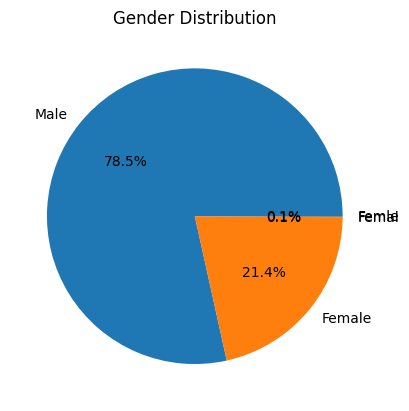

In [ ]:
gender_distribution = df['Gender'].value_counts()
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

# **•	Correlation Analysis:**
o	Is there a correlation between age and salary? Provide the correlation coefficient and interpret the result.

In [ ]:
correlation_age_salary = df['Age'].corr(df['Salary'])
correlation_age_salary

0.6023547357942135

# **•	Salary Analysis:**
o	What is the average salary for individuals based on their educational qualifications (Graduate vs. Post Graduate)?

In [ ]:
avg_salary_education = df.groupby('Education')['Salary'].mean()
avg_salary_education

Education
Graduate         48440.709459
Post Graduate    67456.250000
Name: Salary, dtype: float64

## **•	Loan Status:**
o	What percentage of individuals have taken a personal loan? How does this compare between males and females?

In [ ]:
personal_loan_percentage = df['Personal_loan'].value_counts(normalize=True) * 100
personal_loan_gender = df.groupby('Gender')['Personal_loan'].value_counts(normalize=True) * 100
print(personal_loan_percentage)

Personal_loan
Yes    50.094877
No     49.905123
Name: proportion, dtype: float64


## **•	Marital Status and Dependents:**
o	What is the average number of dependents for married individuals versus single individuals?

In [ ]:
 #Convert 'No_of_Dependents' to numeric, handling non-numeric values
df['No_of_Dependents'] = pd.to_numeric(df['No_of_Dependents'], errors='coerce')

# Now calculate the average dependents per marital status
avg_dependents_marital_status = df.groupby('Marital_status')['No_of_Dependents'].mean()
print(avg_dependents_marital_status)

Marital_status
Married    2.538515
Single     1.608696
Name: No_of_Dependents, dtype: float64


## **•	Partner Employment:**
o	How does the employment status of a partner affect the total combined salary?

In [ ]:
avg_combined_salary_partner_working = df.groupby('Partner_working')['Total_salary'].mean()
avg_combined_salary_partner_working

Partner_working
No     60527.208976
Yes    95314.285714
Name: Total_salary, dtype: float64

## **•	Salary Comparison:**
o	Compare the average salary of individuals whose partners are working versus those whose partners are not working.

In [ ]:
avg_salary_partner_working = df.groupby('Partner_working')['Salary'].mean()
avg_salary_partner_working

Partner_working
No     60271.428571
Yes    60281.336406
Name: Salary, dtype: float64

## **•	House Loan Analysis:**
o	What is the proportion of individuals with house loans based on their profession?

In [ ]:
house_loan_profession = df.groupby('Profession')['House_loan'].value_counts(normalize=True) * 100
house_loan_profession

Profession  House_loan
Business    No            66.569343
            Yes           33.430657
Salaried    No            66.516854
            Yes           33.483146
Name: proportion, dtype: float64

## **•	Salary Distribution:**
o	What is the distribution of salaries for individuals with personal loans versus those without personal loans? Represent it using a box plot.

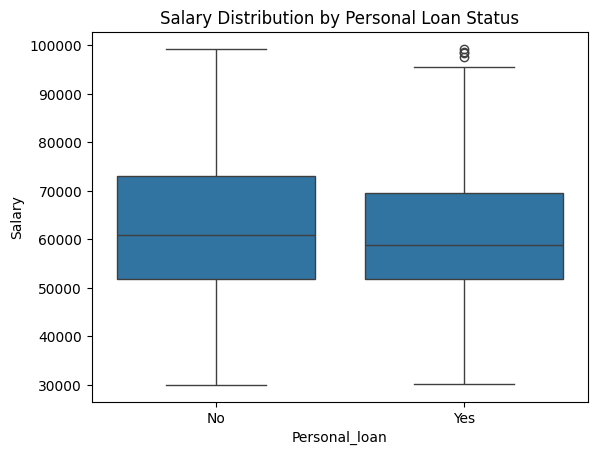

In [ ]:
sns.boxplot(x='Personal_loan', y='Salary', data=df)
plt.title('Salary Distribution by Personal Loan Status')
plt.show()

## **•	Automobile Make Analysis:**
o	How does the type of automobile relate to the salary of the individuals? Provide insights based on the make of the automobile.

In [ ]:
avg_salary_make = df.groupby('Make')['Salary'].mean()
avg_salary_make

Make
?            72500.000000
Hatchback    55083.505155
SUV          72114.436620
Sedan        59775.463623
Name: Salary, dtype: float64

## **•	Price Analysis:**
o	What is the average price of the product/service in the dataset? How does this price vary based on the individual's total salary?

In [ ]:
avg_price_total_salary = df.groupby('Total_salary')['Price'].mean()
avg_price_total_salary

Total_salary
30000     18000.0
30600     22000.0
30900     28000.0
31100     20000.0
31200     18000.0
           ...   
169000    61000.0
169300    66000.0
170000    61000.0
170400    69000.0
171000    69000.0
Name: Price, Length: 754, dtype: float64

## **•	Marital Status and Loans:**
o	Is there a significant difference in the number of personal loans taken by married individuals compared to single individuals?

In [ ]:
personal_loans_marital_status = df.groupby('Marital_status')['Personal_loan'].value_counts(normalize=True) * 100
personal_loans_marital_status

Marital_status  Personal_loan
Married         No               50.103950
                Yes              49.896050
Single          Yes              52.173913
                No               47.826087
Name: proportion, dtype: float64

## **•	Educational Qualification Impact:**
o	How does educational qualification impact the likelihood of taking a house loan?

In [ ]:
house_loan_education = df.groupby('Education')['House_loan'].value_counts(normalize=True) * 100
house_loan_education

Education      House_loan
Graduate       No            66.107383
               Yes           33.892617
Post Graduate  No            67.005076
               Yes           32.994924
Name: proportion, dtype: float64

## **•	Dependent Count Analysis:**
o	Analyze the number of dependents based on the profession of the individual. Which profession has the highest average number of dependents?

In [ ]:
avg_dependents_profession = df.groupby('Profession')['No_of_Dependents'].mean()
avg_dependents_profession

Profession
Business    2.490511
Salaried    2.429054
Name: No_of_Dependents, dtype: float64

## **•	Gender and Salary:**
o	Is there a significant difference in salaries between males and females? Provide statistical evidence.

In [ ]:
salary_gender = df.groupby('Gender')['Salary'].mean()
salary_gender

Gender
Femal     95500.000000
Female    66005.642633
Femle     70000.000000
Male      58781.909548
Name: Salary, dtype: float64

## **•	Regression Analysis:**
o	Build a regression model to predict an individual's salary based on age, education, and number of dependents. Discuss the model's accuracy and significance.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd # Import pandas for data manipulation

X = df[['Age', 'No_of_Dependents']]
X = pd.get_dummies(X.join(df['Education']), drop_first=True)
y = df['Salary']

# Handle missing values in 'y' before splitting
y = y.dropna()  # Remove rows with NaN in 'Salary'

# Adjust 'X' accordingly to match the remaining rows in 'y'
X = X.loc[y.index]  # Keep only the rows in 'X' that correspond to non-NaN values in 'y'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(model.coef_, model.intercept_, r2, mse)

[ 1034.21718513 -3888.1167612  -2564.65594646 -1435.40553084
  -533.5697971   -492.47406735 18473.05051779] 17909.546589033846 0.7945354847604951 46140348.65128979


## **•	Loan Status Impact:**
o	How does having a personal loan affect the total combined salary of the individual and their partner?

In [ ]:
combined_salary_personal_loan = df.groupby('Personal_loan')['Total_salary'].mean()
combined_salary_personal_loan

Personal_loan
No     81077.566540
Yes    78179.924242
Name: Total_salary, dtype: float64

## **•	Partner's Salary Contribution:**
o	What is the average partner's salary for individuals with and without house loans?

In [ ]:
partner_salary_house_loan = df.groupby('House_loan')['Partner_salary'].mean()
partner_salary_house_loan

House_loan
No     20678.243105
Yes    19332.056452
Name: Partner_salary, dtype: float64

## **•	Total Salary Distribution:**
o	Create a histogram showing the distribution of total combined salaries. Identify and discuss any skewness or outliers in the data.

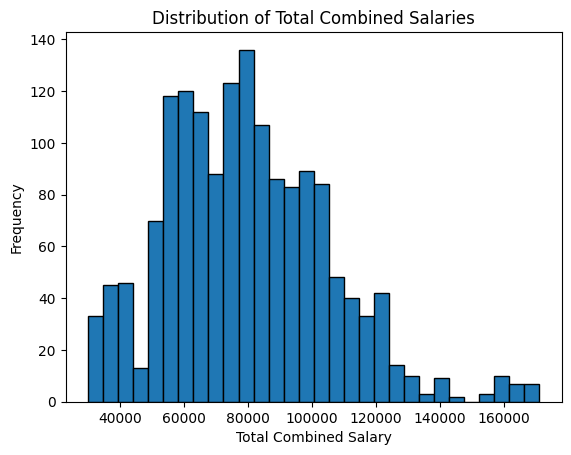

In [ ]:
plt.hist(df['Total_salary'], bins=30, edgecolor='k')
plt.title('Distribution of Total Combined Salaries')
plt.xlabel('Total Combined Salary')
plt.ylabel('Frequency')
plt.show()